In [19]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import scipy.stats as stats

# sympy = symbolic math in python
import sympy as sym
import sympy.plotting.plot as symplot

# Vectors


Using Numpy

In [ ]:
#create a vector
nv = np.array([ [1,2,3] ])
print(nv), print(' ')

#transpose it
print(nv.T), print(' ')

#transpose the transpose!
nvT = nv.T
print(nvT.T), print(' ')

#create a matrix
nm = np.array([ [1,2,3],
                [4,5,6] ])
print(nm), print(' ')

#transpose it
print(nm.T), print(' ')

[[1 2 3]]
 
[[1]
 [2]
 [3]]
 
[[1 2 3]]
 
[[1 2 3]
 [4 5 6]]
 
[[1 4]
 [2 5]
 [3 6]]
 


(None, None)

Using Pytorch

In [ ]:
#create a vector
tv = torch.tensor([ [1,2,3] ])
print(tv), print(' ')

#transpose it
print(tv.T), print(' ')

#transpose the transpose!
tvT = tv.T
print(tvT.T)

tensor([[1, 2, 3]])
 
tensor([[1],
        [2],
        [3]])
 
tensor([[1, 2, 3]])


In [ ]:
#examine data types
print(f'Variable nv is of type {type(nv)}')
print(f'Variable tv is of type {type(tv)}')

Variable nv is of type <class 'numpy.ndarray'>
Variable tv is of type <class 'torch.Tensor'>


Using Numpy

# Dot product

Using Pytorch

In [ ]:
#create the vectors
tv1 = torch.tensor([1,2,3,4,5])
tv2 = torch.tensor([5,-3,7,-4,3])

#dot product via function
print(torch.dot(tv1,tv2)) #still a tensor

#dot product via method
print(torch.sum(tv1 * tv2)) #still a tensor

tensor(19)
tensor(19)


# Matrix Multiplication

Using Pytorch

In [ ]:
#Create random matrices
A = torch.randn(4,3)
B = torch.randn(3,5)
C = torch.randn(5,1)

#Multiplications
D = A @ B
print(D), print('')

E = D @ C
print(E), print('')

tensor([[ 0.8662, -1.5228,  2.8257,  1.9970,  0.9733],
        [-1.0275,  0.5907, -1.6745, -2.5581, -2.1681],
        [-1.3847,  0.8708, -2.4156, -0.9074,  1.6431],
        [ 1.3246, -1.7621,  3.5448,  2.8844,  1.5022]])

tensor([[-5.9062],
        [ 7.1135],
        [-0.0540],
        [-8.1007]])



(None, None)

# Softmax

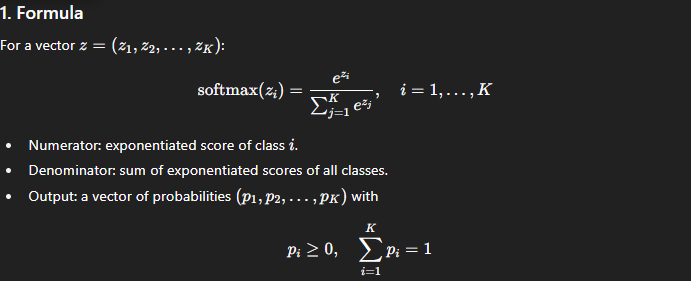

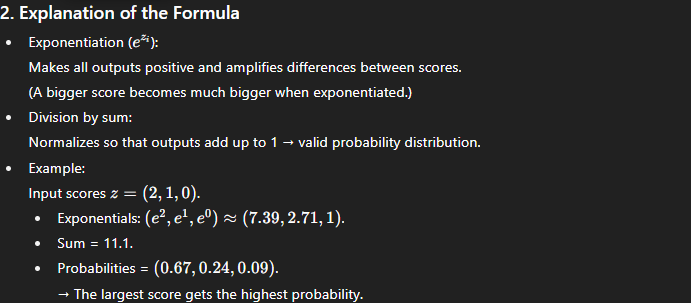

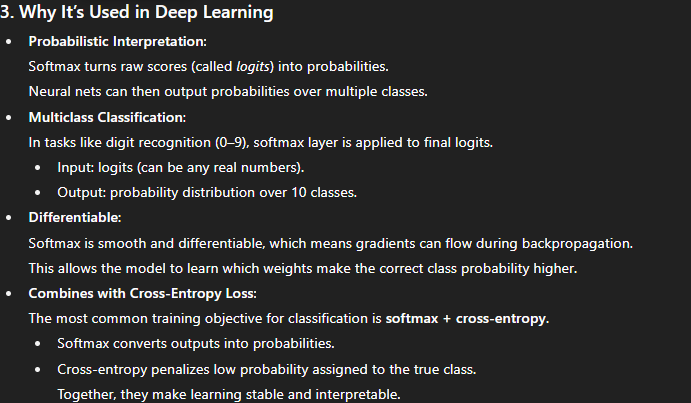

Using Pytorch

In [ ]:
#the list is created with numpy, so its not a tensor! (wont work on Pytorch)
z = np.random.randint(-5,high=15,size=25)
print(z)

# slightly more involved using torch.nn
# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

[ 5  5  3 11 -2 14  7  3 14  7  8  3  5  3 -5  2 -4  0 13  9 -5 12  5 -4
 -1]
[4.81202980e-05 4.81202980e-05 6.51237416e-06 1.94131138e-02
 4.38800319e-08 3.89922813e-01 3.55563581e-04 6.51237416e-06
 3.89922813e-01 3.55563581e-04 9.66522022e-04 6.51237416e-06
 4.81202980e-05 6.51237416e-06 2.18465815e-09 2.39576857e-06
 5.93851655e-09 3.24232018e-07 1.43444587e-01 2.62727925e-03
 2.18465815e-09 5.27703144e-02 4.81202980e-05 5.93851655e-09
 1.19278293e-07]
1.0000000000000002
tensor([4.8120e-05, 4.8120e-05, 6.5124e-06, 1.9413e-02, 4.3880e-08, 3.8992e-01,
        3.5556e-04, 6.5124e-06, 3.8992e-01, 3.5556e-04, 9.6652e-04, 6.5124e-06,
        4.8120e-05, 6.5124e-06, 2.1847e-09, 2.3958e-06, 5.9385e-09, 3.2423e-07,
        1.4344e-01, 2.6273e-03, 2.1847e-09, 5.2770e-02, 4.8120e-05, 5.9385e-09,
        1.1928e-07])


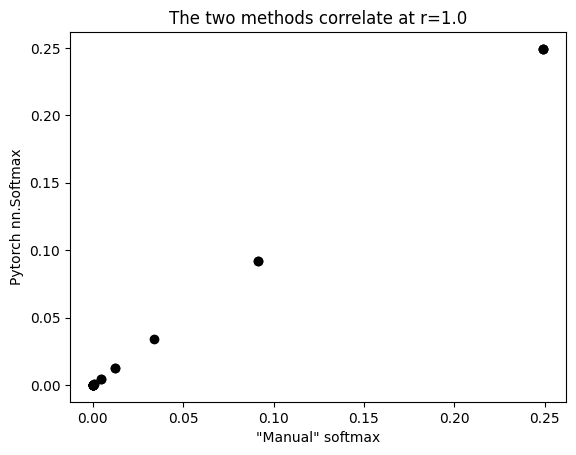

In [ ]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()

# Logarithm

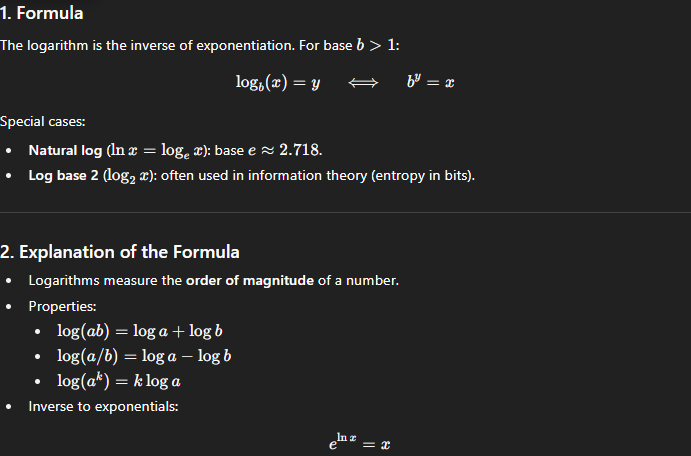

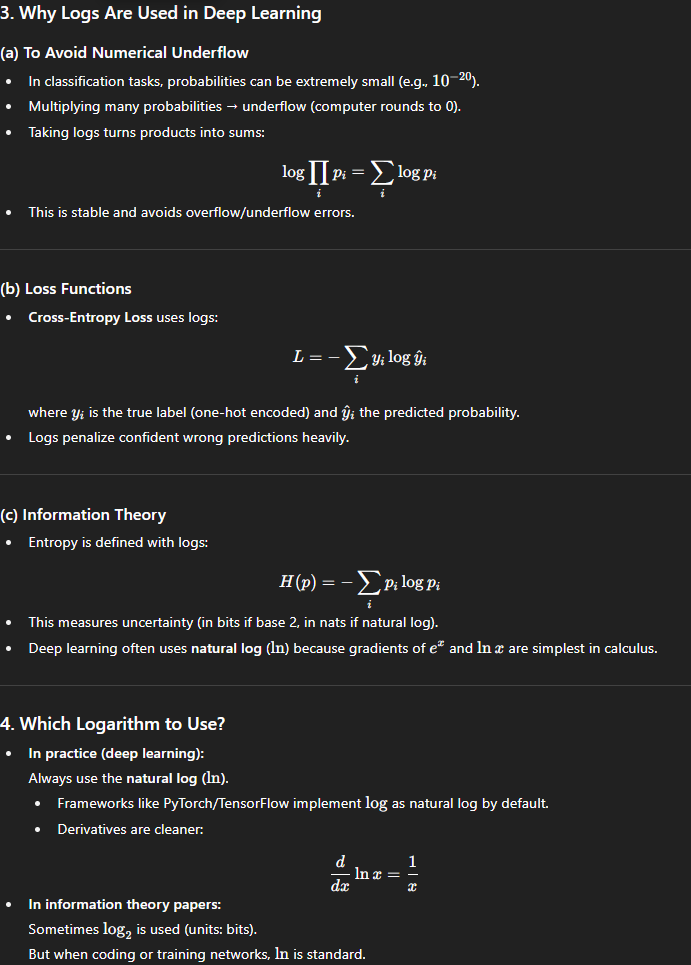

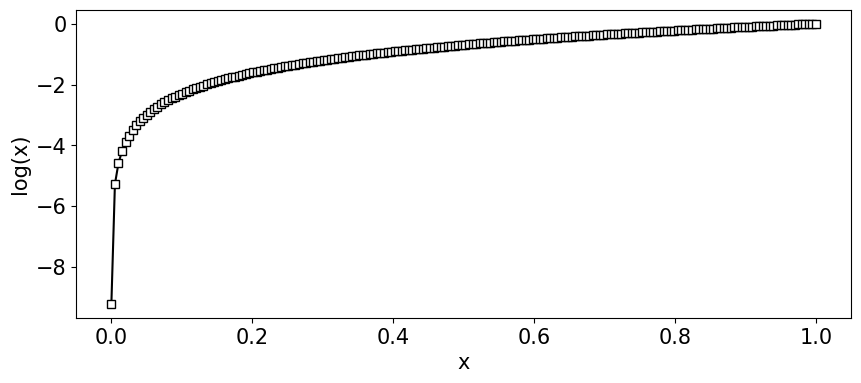

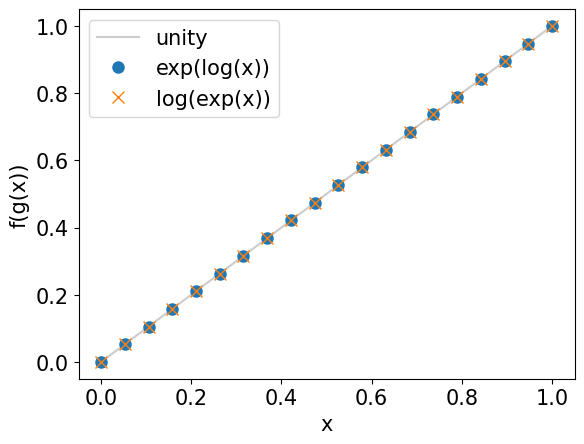

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# define a set of points to evaluate
x = np.linspace(.0001,1,200)

# compute their log
logx = np.log(x)



# plot!
fig = plt.figure(figsize=(10,4))

# increase font size. FYI
plt.rcParams.update({'font.size':15})

plt.plot(x,logx,'ks-',markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()


# demonstration that log and exp are inverses

# redefine with fewer points
x = np.linspace(.0001,1,20)

# log and exp
logx = np.log(x)
expx = np.exp(x)

# the plot
plt.plot(x,x,color=[.8,.8,.8])
plt.plot(x,np.exp(logx),'o',markersize=8)
plt.plot(x,np.log(expx),'x',markersize=8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity','exp(log(x))','log(exp(x))'])
plt.show()

# Entropy and Cross-Entropy

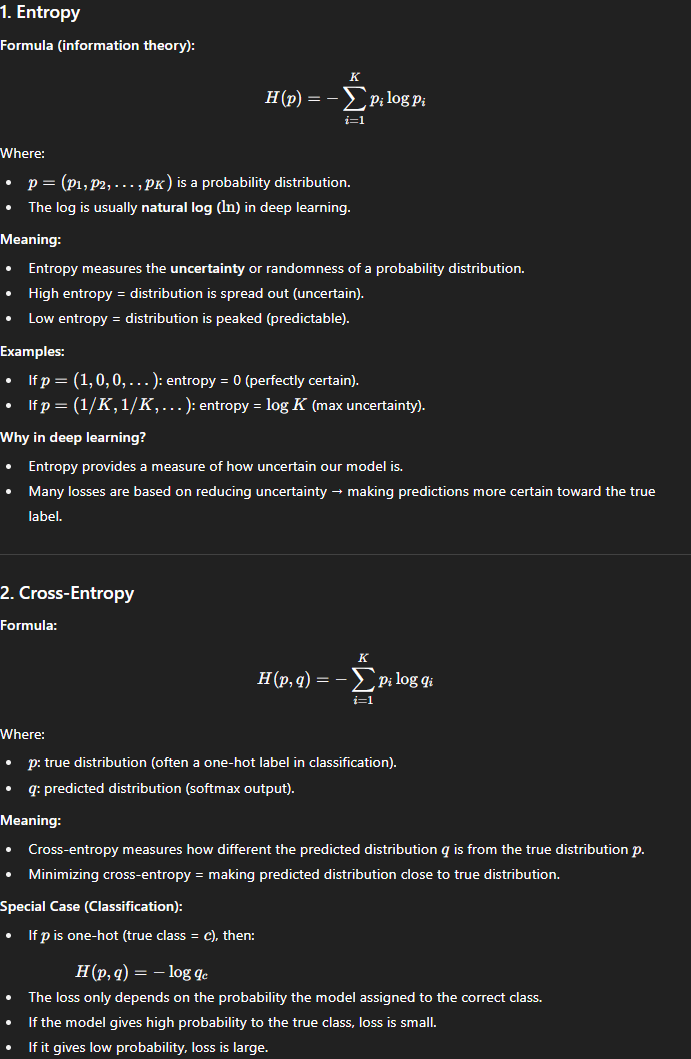

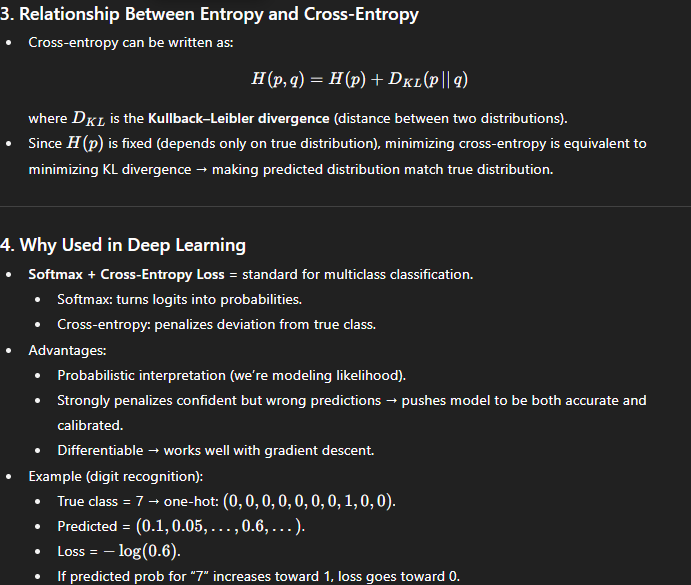

Entropy

In [ ]:
# probability of an event happening
p = .25

# NOT the correct formula!
H = -( p*np.log(p) )
print('Wrong entropy: ' + str(H))

In [ ]:
# the correct way to compute entropy
x = [.25,.75]

H = 0
for p in x:
  H -= p*np.log(p)

print('Correct entropy: ' + str(H))

In [ ]:
# also correct, written out for N=2 events
H = -( p*np.log(p) + (1-p)*np.log(1-p) )
print('Correct entropy: ' + str(H))

Cross-Entropy

In [ ]:
# note: all probs must sum to 1!
p = [   1,0   ] # sum=1
q = [ .25,.75 ] # sum=1

H = 0
for i in range(len(p)):
  H -= p[i]*np.log(q[i])

print('Cross entropy: ' + str(H))

In [ ]:
# also correct, written out for N=2 events
H = -( p[0]*np.log(q[0]) + p[1]*np.log(q[1]) )
print('Correct entropy: ' + str(H))

# simplification
H = -np.log(q[0])
print('Manually simplified: ' + str(H))

In [ ]:
# now using pytorch
import torch
import torch.nn.functional as F

# note: inputs must be Tensors
q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

F.binary_cross_entropy(p,q)

# Min/max and argmin/max

Using numpy

In [ ]:
# create a vector
v = np.array([ 1,40,2,-3 ])

# find and report the maximum and minimum values
minval = np.min(v)
maxval = np.max(v)

print('Min,max: %g,%g' %(minval,maxval) )


# now for the argmin/max
minidx = np.argmin(v)
maxidx = np.argmax(v)

print('Min,max indices: %g,%g' %(minidx,maxidx) ), print(' ')

# confirm
print(f'Min val is { v[minidx] }, max val is { v[maxidx] }')

Min,max: -3,40
Min,max indices: 3,1
 
Min val is -3, max val is 40


In [ ]:
# repeat with matrix
M = np.array([ [0,1,10],
               [20,8,5] ])
print(M), print(' ')

# various minima in this matrix!
minvals1 = np.min(M)        # minimum from ENTIRE matrix
minvals2 = np.min(M,axis=0) # minimum of each column (across rows)
minvals3 = np.min(M,axis=1) # minimum of each row (across columns)

# print them out
print(minvals1)
print(minvals2)
print(minvals3)

[[ 0  1 10]
 [20  8  5]]
 
0
[0 1 5]
[0 5]


In [ ]:
# various minima in this matrix!
minidx1 = np.argmin(M)        # minimum from ENTIRE matrix
minidx2 = np.argmin(M,axis=0) # Index of minimum of each column (across rows)
minidx3 = np.argmin(M,axis=1) # Index of minimum of each row (across columns)

# print them out
print(M), print(' ') # reminder
print(minidx1)
print(minidx2)
print(minidx3)

[[ 0  1 10]
 [20  8  5]]
 
0
[0 0 1]
[0 2]


Now using pytorch

In [ ]:
# create a vector
v = torch.tensor([ 1,40,2,-3 ])

# find and report the maximum and minimum values
minval = torch.min(v)
maxval = torch.max(v)

print('Min,max: %g,%g' %(minval,maxval) )


# now for the argmin/max
minidx = torch.argmin(v)
maxidx = torch.argmax(v)

print('Min,max indices: %g,%g' %(minidx,maxidx) ), print(' ')

# confirm
print(f'Min val is { v[minidx] }, max val is { v[maxidx] }')

Min,max: -3,40
Min,max indices: 3,1
 
Min val is -3, max val is 40


In [ ]:
# repeat with matrix
M = torch.tensor([ [0,1,10], [20,8,5] ])
print(M), print(' ')

# various minima in this matrix!
min1 = torch.min(M)        # minimum from ENTIRE matrix
min2 = torch.min(M,axis=0) # minimum of each column (across rows)
min3 = torch.min(M,axis=1) # minimum of each row (across columns)

# print them out
print(min1), print(' ')
print(min2), print(' ')
print(min2.values)
print(min2.indices)


tensor([[ 0,  1, 10],
        [20,  8,  5]])
 
tensor(0)
 
torch.return_types.min(
values=tensor([0, 1, 5]),
indices=tensor([0, 0, 1]))
 
tensor([0, 1, 5])
tensor([0, 0, 1])


In [ ]:
min2.count

<function min.count(value, /)>

# Mean and Variance

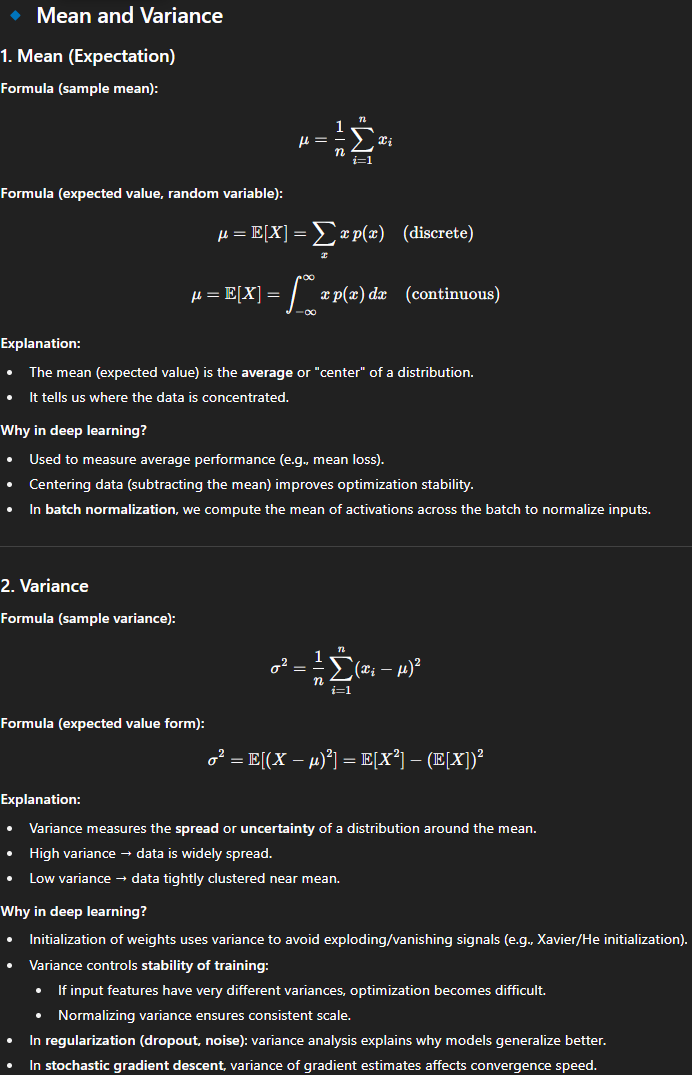

In [ ]:
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0]
n = len(x)

# compute the mean
mean1 = np.mean(x)
mean2 = np.sum(x) / n

# print them
print(mean1)
print(mean2)

In [ ]:
# variance

var1 = np.var(x)
var2 = (1/(n-1)) * np.sum( (x-mean1)**2 )

print(var1)
print(var2)

In [ ]:
# uh oh!

var3 = np.var(x,ddof=1) #ddof is degres of freedom

print(var3)
print(var2)

In [ ]:
# does it matter for large N?
# The larger N is, the smaller the difference of biased vs unbiased
# Always used unbiased for small to medium data sets!

N = 10000
x = np.random.randint(0,high=20,size=N)

var0 = np.var(x,ddof=0) # biased
var1 = np.var(x,ddof=1) # unbiased

print(var0)
print(var1)

# Sampling variability

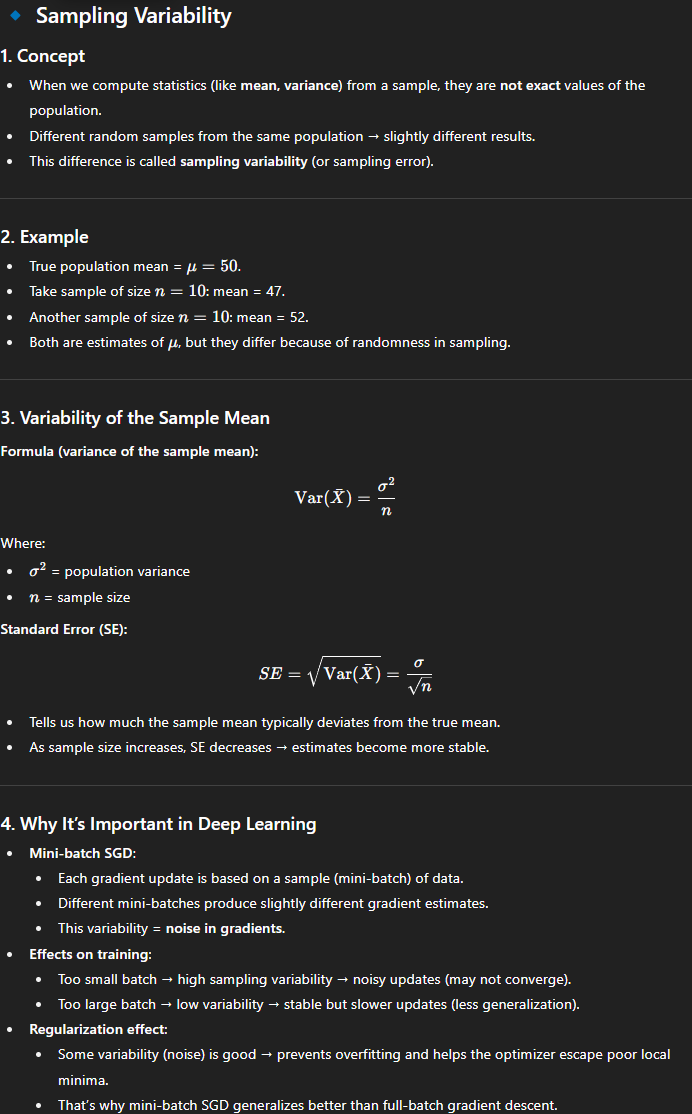

In [ ]:
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
n = len(x)

# compute the population mean
popmean = np.mean(x)

# compute a sample mean
sample = np.random.choice(x,size=5,replace=True)
sampmean = np.mean(sample)

# print them
print(popmean)
print(sampmean)

1.625
3.2


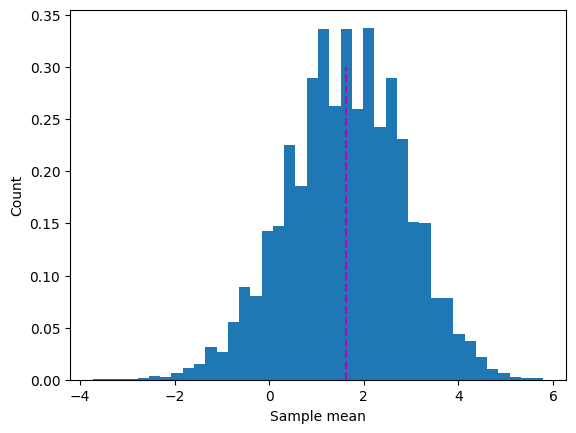

In [ ]:
# compute lots of sample means

# number of experiments to run
nExpers = 10000

# run the experiment!
sampleMeans = np.zeros(nExpers)
for i in range(nExpers):

  # step 1: draw a sample
  sample = np.random.choice(x,size=15,replace=True)

  # step 2: compute its mean
  sampleMeans[i] = np.mean(sample)



# show the results as a histogram
plt.hist(sampleMeans,bins=40,density=True)
plt.plot([popmean,popmean],[0,.3],'m--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()

# Reproducible Randomness via Seeding

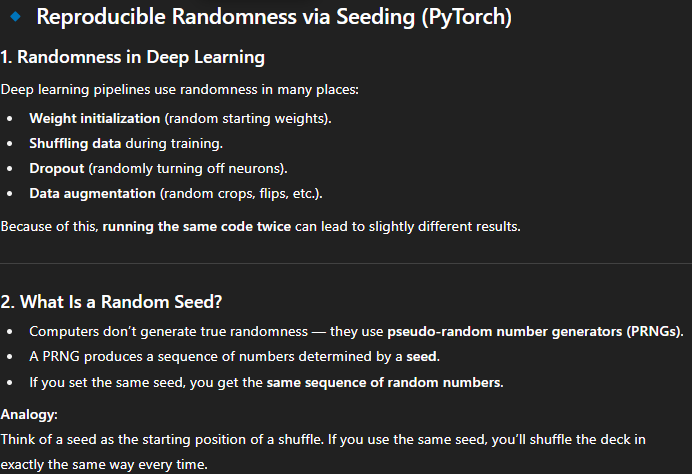

In [ ]:
# generate a few random numbers
np.random.randn(5)


In [ ]:
# repeat after fixing the seed (old-but-still-widely-used method)
np.random.seed(17) #fixed seed (will always get the same random numbers)
print(np.random.randn(5))
print(np.random.randn(5))

# [ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
# [ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]


New seed mechanism in numpy

In [ ]:
randseed1 = np.random.RandomState(17)
randseed2 = np.random.RandomState(20210530)

print( randseed1.randn(5) ) # same sequence
print( randseed2.randn(5) ) # different from above, but same each time
print( randseed1.randn(5) ) # same as two up
print( randseed2.randn(5) ) # same as two up
print( np.random.randn(5) ) # different every time!

# [ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
# [-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
# [ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
# [ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
# [ 2.171257    1.15231025 -1.81881234 -0.13804934  0.53983961]

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
[0.33888216 0.45415013 0.72883766 0.13294199 0.27565509]


Now in pytorch

In [ ]:
torch.randn(5)

tensor([ 0.1111, -0.7492, -0.0412,  1.0852,  1.8979])

In [ ]:
torch.manual_seed(17)
print( torch.randn(5) )
#tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])

# torch's seed doesn't spread to numpy (will be different every run)
print( np.random.randn(5) )

tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
[-1.15541329  3.34515739  0.12672721 -0.6941789   0.55767443]


# T-test

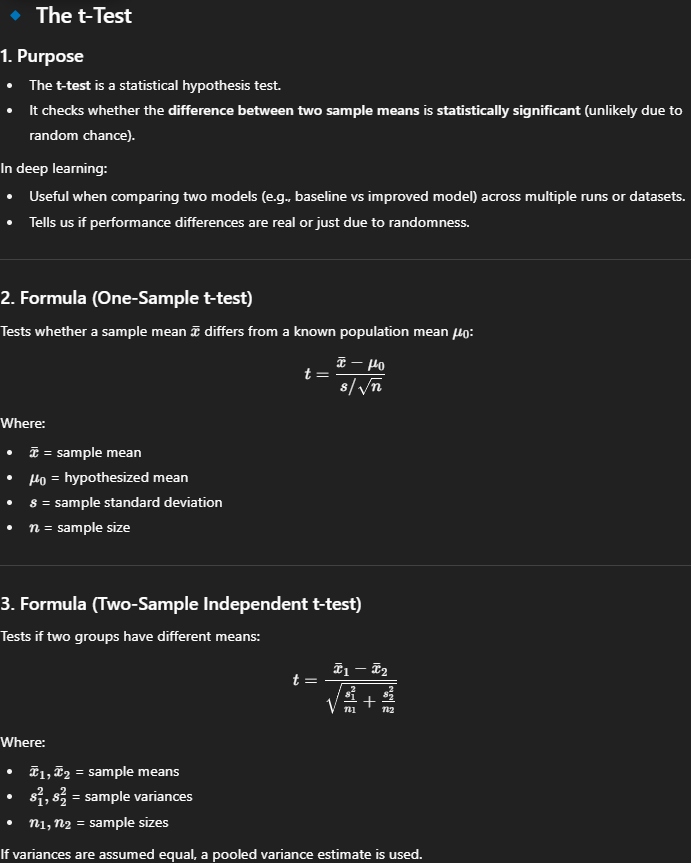

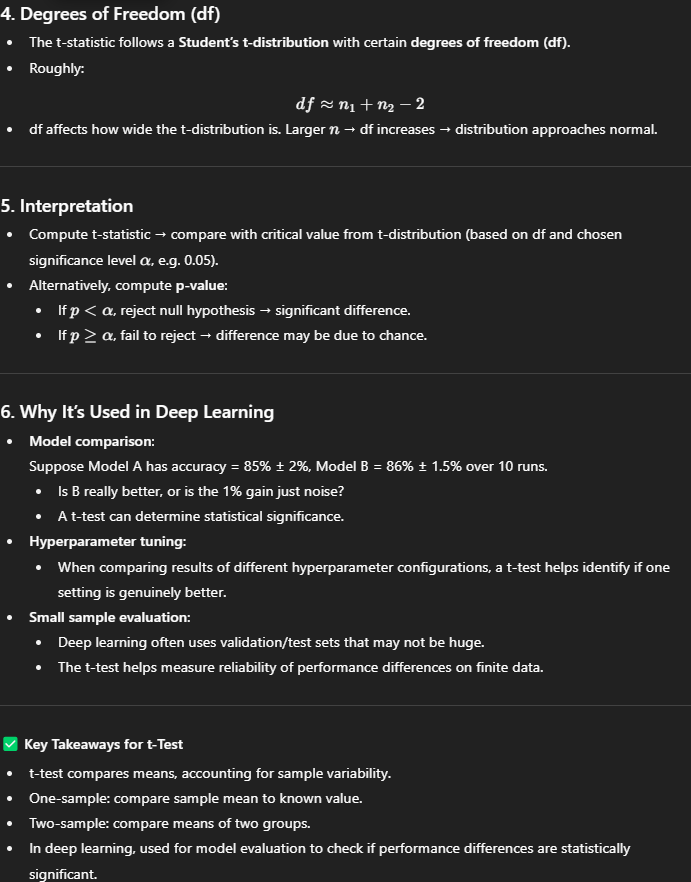

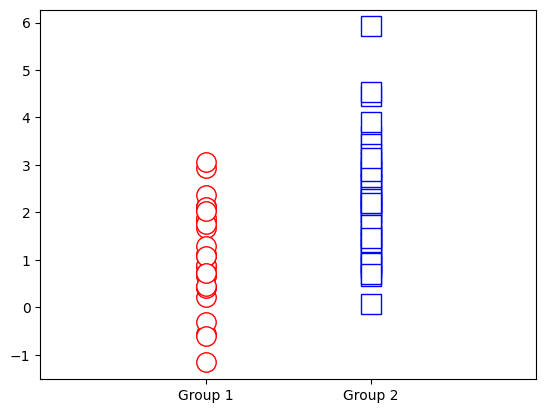

In [15]:
# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 2   # population mean in dataset 2

# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)



# plot them
plt.plot(np.zeros(n1),data1,'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2), data2,'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()

In [16]:
# t-test via stats package

# _ind = independent samples
t,p = stats.ttest_ind(data2,data1)
print(t)
print(p)

4.279627535543483
6.0038538961523e-05


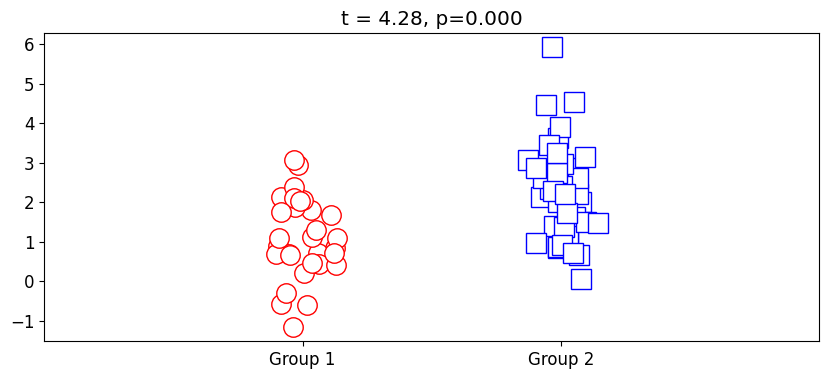

In [17]:
# common way to show t-test results in a plot
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12}) # change the font size

plt.plot(0+np.random.randn(n1)/15, data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])

# set the title to include the t-value and p-value
plt.title(f't = {t:.2f}, p={p:.3f}')

plt.show()

# Derivatives: Intuition and polynomials

In [20]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create a function
fx = 2*x**2

# compute its derivative
df = sym.diff(fx,x)

# print them
print(fx)
print(df)

2*x**2
4*x


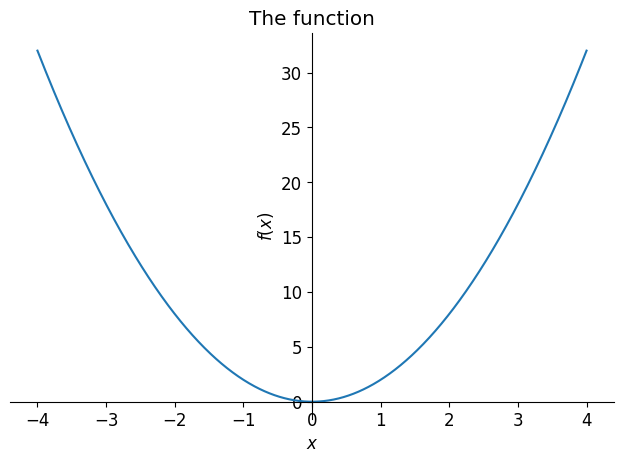

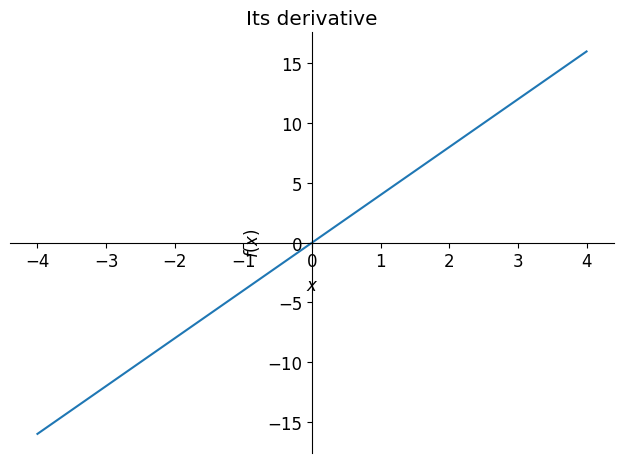

In [21]:
# plot them
symplot(fx,(x,-4,4),title='The function')
plt.show()

symplot(df,(x,-4,4),title='Its derivative')
plt.show()

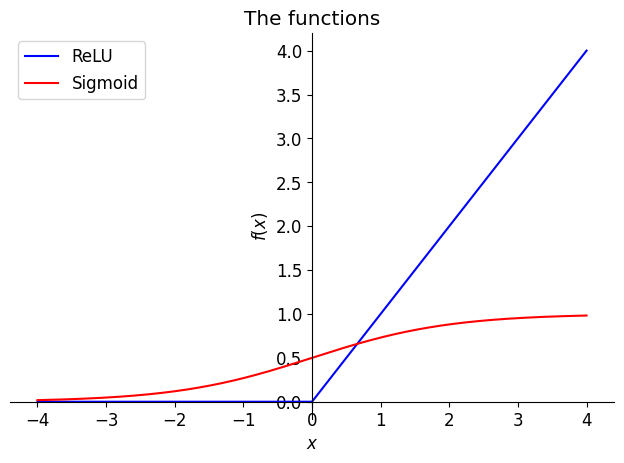

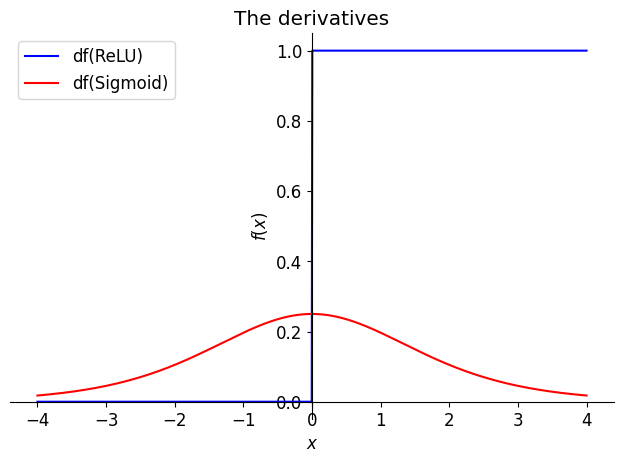

In [22]:
# repeat with relu and sigmoid

# create symbolic functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# graph the functions
p = symplot(relu,(x,-4,4),label='ReLU',show=False,line_color='blue')
p.extend( symplot(sigmoid,(x,-4,4),label='Sigmoid',show=False,line_color='red') )
p.legend = True
p.title = 'The functions'
p.show()


# graph their derivatives
p = symplot(sym.diff(relu),(x,-4,4),label='df(ReLU)',show=False,line_color='blue')
p.extend( symplot(sym.diff(sigmoid),(x,-4,4),label='df(Sigmoid)',show=False,line_color='red') )
p.legend = True
p.title = 'The derivatives'
p.show()

# Derivatives: mutiplication of derivatives

In [23]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create two functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

# compute their individual derivatives
df = sym.diff(fx)
dg = sym.diff(gx)

# apply the product rule "manually"
manual = df*gx + fx*dg
thewrongway = df*dg

# via sympy
viasympy = sym.diff( fx*gx )


# print everything
print('The functions:')
display(fx)
display(gx)
print(' ')

print('Their derivatives:')
display(df)
display(dg)
print(' ')

print('Manual product rule:')
display(manual)
print(' ')

print('Via sympy:')
display(viasympy)
print(' ')


print('The wrong way:')
display(thewrongway)

The functions:


2*x**2

-3*x**4 + 4*x**3

 
Their derivatives:


4*x

-12*x**3 + 12*x**2

 
Manual product rule:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
Via sympy:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
The wrong way:


4*x*(-12*x**3 + 12*x**2)

In [ ]:
# repeat with chain rule
gx = x**2 + 4*x**3
fx = ( gx )**5

print('The function:')
display(fx)
print(' ')

print('Its derivative:')
display(sym.diff(fx))